# Problem Statement

The main goal of this project is **to perform extensive Exploratory Data Analysis** (EDA) on the Zomato Dataset and build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features.

**Approach :** 
- The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.


In [1]:
!pip install pandas numpy scipy statsmodels

In [2]:
!pip install matplotlib seaborn plotly

In [3]:
!pip install sklearn xgboost

In [4]:
!pip install missingno

In [5]:
!pip install lightgbm

In [70]:
!pip freeze

anyio==3.3.0
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037869401/work
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
Babel==2.9.1
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1628110601003/work
certifi==2021.5.30
cffi @ file:///C:/ci/cffi_1625831756778/work
charset-normalizer==2.0.4
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
cycler==0.10.0
decorator @ file:///tmp/build/80754af9/decorator_1621259047763/work
defusedxml @ file:///tmp/build/80754af9/defusedxml_1615228127516/work
entrypoints==0.3
idna==3.2
importlib-metadata @ file:///C:/ci/importlib-metadata_1617877477759/work
ipykernel @ file:///C:/ci/ipykernel_1607454116140/work/dist/ipykernel-5.3.4-py3-none-any.whl
ipython @ file:///C:/ci/ipython_1628244015142/work
ipython-genutils @ file:///tmp/build/80754af9/ipython_genutils_1606773439826/work
ipywidgets @

## Loading required packages

In [41]:
import pandas as pd # Data Manipulation
import numpy as np # Linear Algebra

# Data Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Statistical Manipulation
import scipy
import statistics as stat
import statsmodels.api as sm

# too Ignore, if any, warnings occured
import warnings
warnings.filterwarnings("ignore")

# to unzip, zip files
# from zipfile import ZipFile 

# Data Preparing 
    
    1. Loading Dataset
    2. General Data Analysis,
    3. Descriptive Statistical Analysis,
    4. Data Visualization,
    5. Outlier / Anomaly Detection

### 1. **Loading Dataset**

In [74]:
# Unzipping file

# specifying the zip file name
file_name = "archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

NameError: name 'ZipFile' is not defined

In [42]:
# Loading DataFrame using pandas.read_csv() function
restrurant_rate_data = pd.read_csv("zomato.csv")

# Creating shollow copy()
data = restrurant_rate_data.copy()

### 2. **General Data Analysis**
  
  - Looks Head & Tail Records
  - Dimensions of DataFrame
  - Concise Summary
  - Checking Missing Values, if any
  - Checking Duplicate Records, if any
  - Unique values consists in each attributes

In [8]:
# Checking Head records
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [9]:
# Checking tail records
data.tail()

url  \
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes           phone                    location  \
51712         No  3.6 /5     27    080 40301477                  Whitefield   
51713         No     NaN      0  +91 8197675843                  Whitefield   
51714         No     NaN      0             NaN                  Whitefield   
51715        Yes  4.3 /5    236    080 49652769  ITPL Main Road, Whitefield   
51716         No  3.4 /5     13  +91 8071117272  ITPL Main Road, Whitefield   

                rest_type                    dish_liked  \
51712                 Bar                           NaN   
51713                 Bar                           NaN   
51714                 Bar                           NaN   
51715                 Bar  Cocktails, Pizza, Buttermilk   
51716  Bar, Casual Dining                           NaN   

                                     cuisines approx_cost(for two people)  \
51712                             Continental                       1,500   
51713                             Finger Food                         600   
51714                             Finger Food                       2,000   
51715                             Finger Food                       2,500   
51716  Finger Food, North Indian, Continental                       1,500   

                                            reviews_list menu_item  \
51712  [('Rated 5.0', "RATED\n  Food and service are ...        []   
51713                                                 []        []   
51714                                                 []        []   
51715  [('Rated 4.0', 'RATED\n  Nice and friendly pla...        []   
51716  [('Rated 5.0', 'RATED\n  Great ambience , look...        []   

      listed_in(type) listed_in(city)  
51712   Pubs and bars      Whitefield  
51713   Pubs and bars      Whitefield  
51714   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield

**iNSIGHTS -**
  - The head and tail records shows our dataset is loaded successfully with all rows and attributes.

In [10]:
print(f"--- Restaurant Rating Data consists {data.shape[0]} rows. \n")
print(f"--- Restaurant Rating Data consists {data.shape[1]} attributes. \n")
print(f"--- Restaurant Rating Data following attributes - \n    {'-'*50}\n    {data.columns.tolist()}\n")
print(f"--- Missing Values(total), if any, consists in Dataset -  {data.isnull().sum().sum()}\n")
print(f"--- Duplicate Values(total), if any, consists in Dataset - {data.duplicated(keep = 'first').sum()}\n")

--- Restaurant Rating Data consists 51717 rows. 

--- Restaurant Rating Data consists 17 attributes. 

--- Restaurant Rating Data following attributes - 
    --------------------------------------------------
    ['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

--- Missing Values(total), if any, consists in Dataset -  37700

--- Duplicate Values(total), if any, consists in Dataset - 0



In [11]:
# Concise Summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

- **INSIGHTS -**
  1. Dataset consists 51,717 rows 
  2. Their are 16 **Independent Variables** along with 1 **Target Variables**.
  3. Their are **Missing Values** in some columns some are less some are extreme. We will see in further sperate steps.
      - their is missing value in our 'rate' (target column.)
  4. "**url**" attribute is no use in our model, so are going to drop that.
  5. "**review_list**" and "**menu_list**" is in **`.json`** format.
  6. Their is no **Duplicate Values / Records** in data.
  
Now onwards We will look into each attribute as seprate so We can understand the pattern and develop what kind of processing we should apply. 



**# Missing Values** 
   - We will look into each Attributes has any missing values
   - plot missing value
   - get % of missing data
   - later impute missing values with proper method
    
 
In following Lines

In [35]:
data.isna().sum() # it will give us, if missing values exists in sum 

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_outoff                    10052
cost(for_2)                      346
dtype: int64

In [13]:
# Creating DataFrame for Missing Values as per Attributes
percent_missing = (data.isnull().sum() / len(data))*100 # Getting % per column 
missing_value_data = pd.DataFrame({'percent_missing': percent_missing}) # Creating DataFrame

missing_value_data

percent_missing
url                                 0.000000
address                             0.000000
name                                0.000000
online_order                        0.000000
book_table                          0.000000
rate                               15.033741
votes                               0.000000
phone                               2.335789
location                            0.040606
rest_type                           0.438927
dish_liked                         54.291626
cuisines                            0.087012
approx_cost(for two people)         0.669026
reviews_list                        0.000000
menu_item                           0.000000
listed_in(type)                     0.000000
listed_in(city)                     0.000000

<AxesSubplot:>

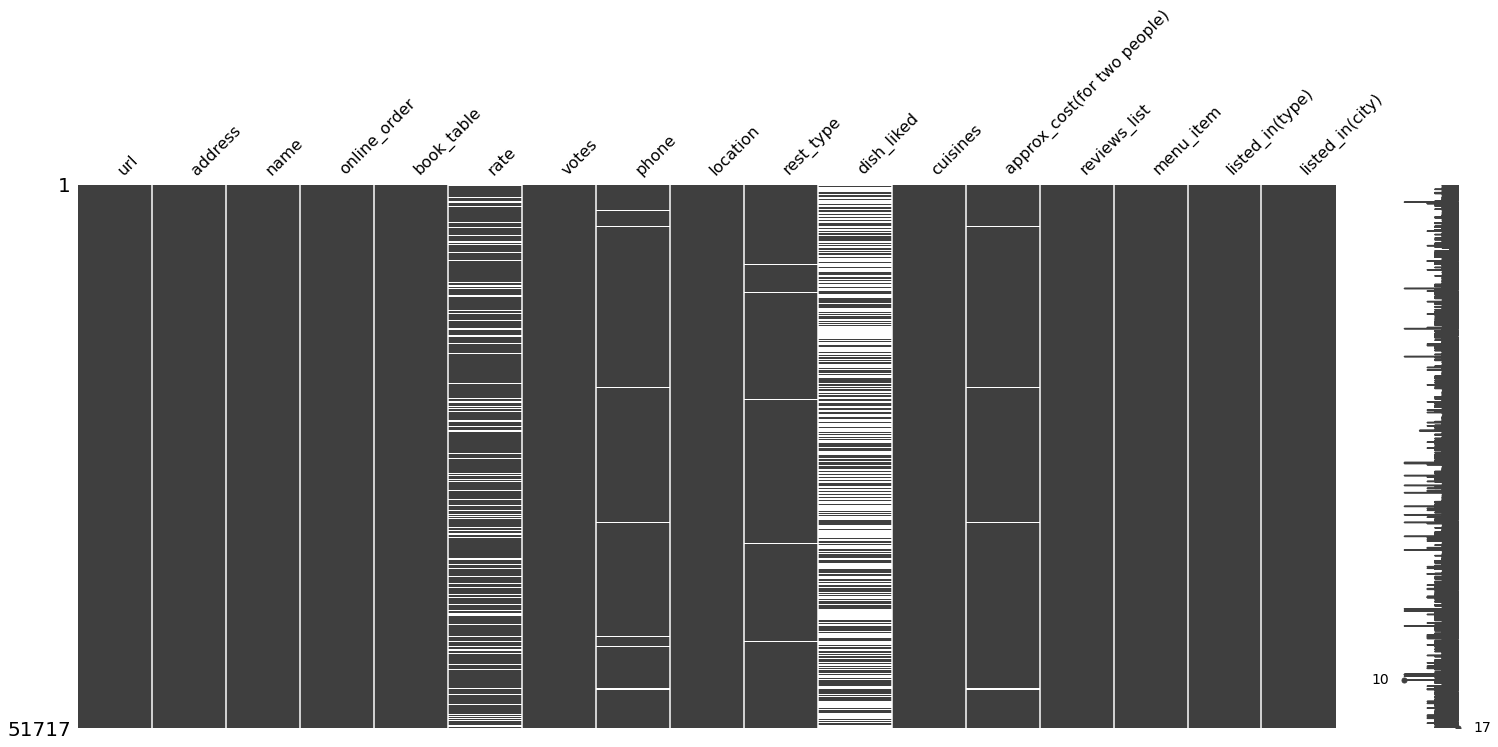

In [14]:
import missingno as msno
  
# Visualize missing values as a matrix
msno.matrix(data)

- **INSIGHTS -**
   - Attribute **`dish_liked`** has missing value more than 50%.
       - As 'dish_liked' has more than 50% missing values, so we are droping this attributes
   - While attribute **`rate`** hase missing values upto 16%.
       - We will try to impute here with right means.

**Duplicates Records**

In [15]:
data.duplicated(keep = 'first').sum()

0

**Unique Value Column-wise**

In [16]:
data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

### 3. Descriptive Statistical Analysis

- Measure of Central Tendency : Mean & Median, Mode,
- Measure of Dispersion : Range, Variance, Standard Deviation, Coefficient of Variance


In [18]:
# Descriptinve statistical summary for Numeric DataTypes
data.describe(include=[np.number]).T

count        mean         std  min  25%   50%    75%      max
votes  51717.0  283.697527  803.838853  0.0  7.0  41.0  198.0  16832.0

In [19]:
# Descriptive statistical summary for Object DataType 
data.describe(include = ['O']).drop('count').T

unique  \
url                          51717   
address                      11495   
name                          8792   
online_order                     2   
book_table                       2   
rate                            64   
phone                        14926   
location                        93   
rest_type                       93   
dish_liked                    5271   
cuisines                      2723   
approx_cost(for two people)     70   
reviews_list                 22513   
menu_item                     9098   
listed_in(type)                  7   
listed_in(city)                 30   

                                                                           top  \
url                          https://www.zomato.com/bangalore/jalsa-banasha...   
address                                                          Delivery Only   
name                                                           Cafe Coffee Day   
online_order                                                               Yes   
book_table                                                                  No   
rate                                                                       NEW   
phone                                                             080 43334321   
location                                                                   BTM   
rest_type                                                          Quick Bites   
dish_liked                                                             Biryani   
cuisines                                                          North Indian   
approx_cost(for two people)                                                300   
reviews_list                                                                []   
menu_item                                                                   []   
listed_in(type)                                                       Delivery   
listed_in(city)                                                            BTM   

                              freq  
url                              1  
address                        128  
name                            96  
online_order                 30444  
book_table                   45268  
rate                          2208  
phone                          216  
location                      5124  
rest_type                    19132  
dish_liked                     182  
cuisines                      2913  
approx_cost(for two people)   7576  
reviews_list                  7595  
menu_item                    39617  
listed_in(type)              25942  
listed_in(city)               3279

**INSIGHTS -**
  - From above descriptive statistic summary -
     - Only **`votes`** have mean, standard deviation, and meadian. It looks like affected with **Outliers** 
     - Remaining all attributes are **`Object` type**, so we only have mode.


Even in futher steps I will look into each attribute separately, so I can do some cleaning and change dataypes for Rate and approx_cost(for two people) in it.

**Data Cleaning part - I**

I. **Cleaning "`rate` attribute"**

In [43]:
"""
- Oprations on 'rate' attributes

    1. spliting rate on the basis of '/'. 
       Why? - the given rate in format of rate/5, like 4.1/5.

    2. replaced 'NEW' value as '0.0' rating, reason even it's new restraurant but orders will receive. 
       As same I also replacing '-' value with np.NaN.

    3. Changing DataType as 'float32' from object type

"""

# Spliting new_data['rate'] into "rate" & "rate_outoff"
data[['rate', 'rate_outoff']]= data['rate'].str.split('/',expand=True)

# Displaying Unique values Before Replacement
print(f'Unique Values Before Replacing in Rate attribute - \n{"-"*50} \n{data["rate"].unique()}\n\n')

# Replacing "NEW" and "-" with 'np.nan' values in rate attribute
data['rate'].replace(to_replace =['NEW', '-'], value = np.nan, inplace = True)
# data['rate'].replace(to_replace ='-', value = np.nan, inplace = True)

# Removing "whitespace" from some ratings
data['rate'] = data['rate'].str.strip()

# Changing datatype of "rate" feature
data['rate'] = data['rate'].astype('float32')
print(f'Unique Values After DataType Change in Rate attribute - \n{"-"*60} \n{data["rate"].unique()}')

# new_data.head()

Unique Values Before Replacing in Rate attribute - 
-------------------------------------------------- 
['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' 'NEW' '2.9' '3.5' nan '2.6' '3.8 ' '3.4' '4.5' '2.5'
 '2.7' '4.7' '2.4' '2.2' '2.3' '3.4 ' '-' '3.6 ' '4.8' '3.9 ' '4.2 '
 '4.0 ' '4.1 ' '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 '
 '3.2 ' '2.6 ' '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 '
 '3.0 ' '4.8 ' '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']


Unique Values After DataType Change in Rate attribute - 
------------------------------------------------------------ 
[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 nan 2.9 3.5
 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]


II. **Cleaning `approx_cost(for two people)` and renaming it as `cost(for_2)`**

In [44]:
# Checking Unique values Before striping ',' and changing dtype to 'float32'
print(f"Unique values before Striping ',' and changing dtype : \n{'-'*50}\n")
print(data['approx_cost(for two people)'].unique(), '\n')

# Stripping ',' with '' from data['approx_cost(for two person)']
data['cost(for_2)'] = data['approx_cost(for two people)'].str.replace(',', '').astype('float32')

# Checking unique values after removal of ',' and change dataType
print(f"\nUnique values after striping ',' and dtype change - \n{'-'*50}\n")
print(data['cost(for_2)'].unique(), '\n')

Unique values before Striping ',' and changing dtype : 
--------------------------------------------------

['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600'
 '120' '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050'
 '2,300' '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140'] 


Unique values after striping ',' and dtype change - 
--------------------------------------------------

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199.   80.
 1100.  160. 1600.  230.  130.   50.  190. 1700.   nan 1400.  180. 1350.
 2200. 2000. 1800. 1900.  330. 2500. 2100. 3000. 2800. 3400.   40. 125

### 4. Data Visualization


- Uni-Variant Analysis
- Bi-Variant Analysis
- Multi-Variant Analysis


**1. Uni-Variant Analysis -** 


   - In this analysis, I am analysing one-by-one independent variables with the help of **Visualization**.

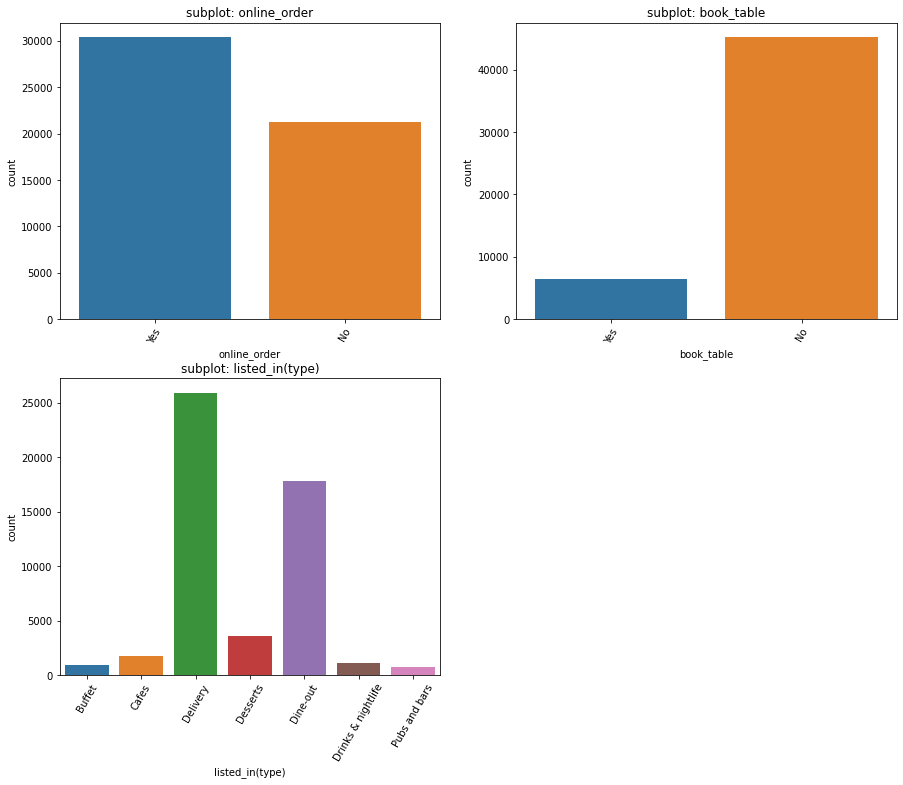

In [22]:
# Categorial Data
cat_cols = ['online_order','book_table', 'listed_in(type)']

a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15, 12))

for i in cat_cols:
    plt.subplot(a, b, c)
    plt.title('subplot: {}'.format(i))
    plt.xlabel(i)
    plt.xticks(rotation=60)
    sns.countplot(data[i])
    c = c + 1

plt.show()


**iNSIGHTS -**
- for **online_order** -
    - **upto 65%** Restaurants accepts **online orders** from customers.
    - while **around 35%** Restaurants didn't accepts **online orders** from customers. these restaurants might be either **Book Tables** or **Drive-in Customers**.
    
    
    
- for **book_table** -
    - from above **online_order** point 2, only **around 15%** Restaurants allows **table booking** for customers.
    - while **around 85%** Restaurants doesn't allow **table booking** facility. These restaurants might be either **accepting online orders** or **Drive in Customer**.
    

> We can conclude from above two attributes, **around 20%** Restaurant doesn't allows neither **Online Orders** nor **Book Tabels**. These restaurants are **Drive-in Restaurants** means customers directly approch these restaurants either for dining or any other meal. 


- for **listed_in(type)** -
    - **Delivery** and **Dine-out** are most preferred **Order_Type**.
    - while **Pubs and bars** are less preferred as compered to others.
        - here, we can merge **Pubs and bars** with **Dinks & nightlife**


> Also as we concluded in **online_order** and **book_tabel**, we can see in **listed_in(type)** that **from 70% to 80%** people preferred either **Delivery** through online ordering from Restaurants or **Dine-out** through table booking in Restaurants.


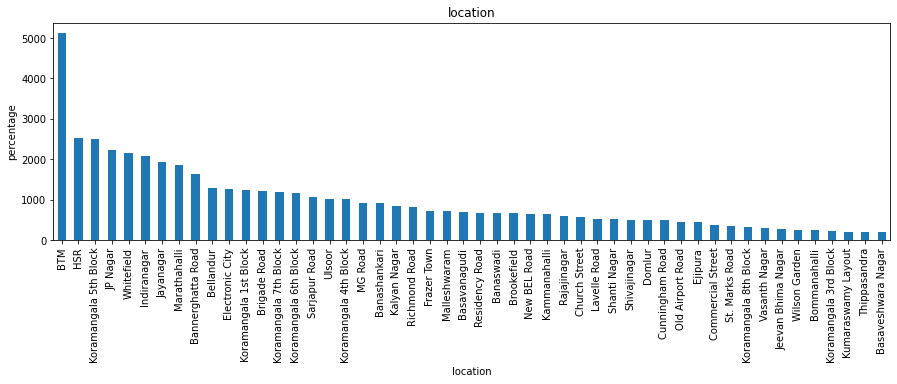

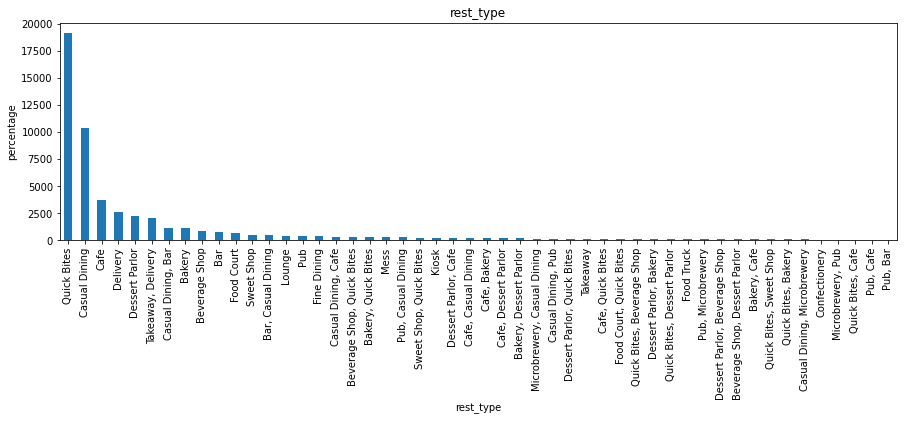

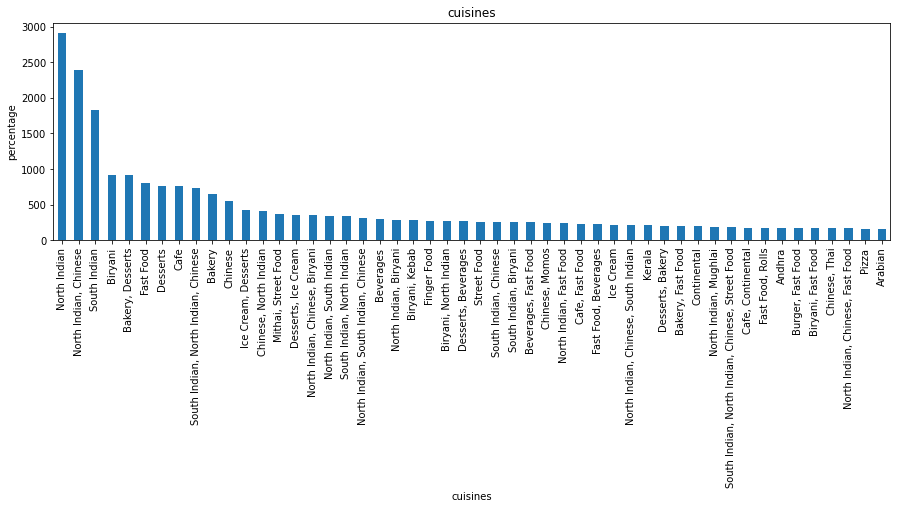

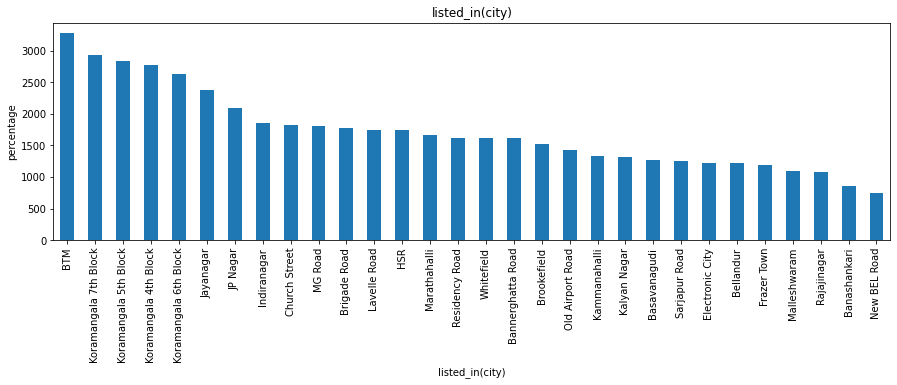

In [23]:
cat_cols = ['location', 'rest_type', 'cuisines', 'listed_in(city)']

for i in cat_cols:
    data[i].value_counts().head(50).plot.bar(figsize = (15, 4))
    plt.title(data[i].name)
    plt.xlabel(data[i].name)
    plt.xticks(rotation=90)
    plt.ylabel('percentage')
    plt.show()

**iNSIGHTS -**

- for **location** -
    - **BTM** is most favorites location then others.
  
  
- for **rest_type** -
    - **Quick Bites**, **Casual Dining** and **Cafes** are most preferred Restaurant types for ordering.
     
     
- for **cusines** -
    - **North Indian**, **North Indian, Chinese** and **South Indian** are **most favorites cusines** and preferred for ordering then others.
    
        
- for **listed_in(city)** -
    - **BTM** city restaurants are more preferable as compared to others.
    
    
> As we see in above Bar Plots, if we **merge** all **"Koramangala Blocks"** as one it might be most perferabel city as we as location.         


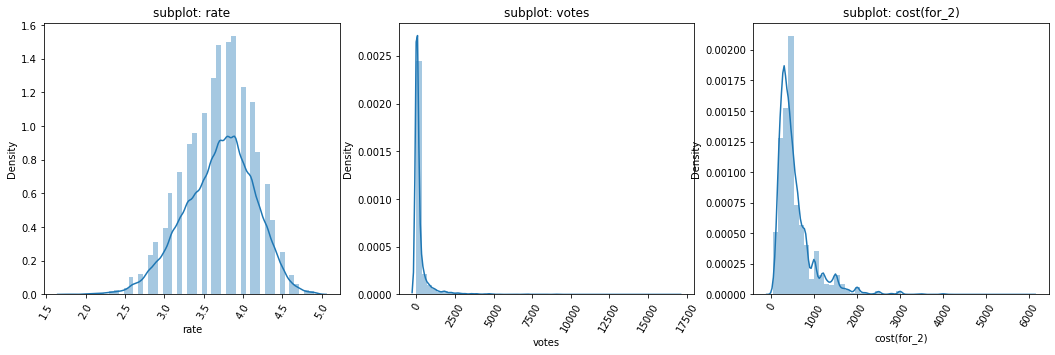

In [24]:
num_cols = ['rate', 'votes', 'cost(for_2)']

a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18, 5))

for i in num_cols:
    plt.subplot(a, b, c)
    plt.title('subplot: {}'.format(i))
    plt.xlabel(i)
    plt.xticks(rotation=60)
    sns.distplot(data[i])
    c = c + 1

plt.show()

**iNSIGHTS -**

- for **rate** -
    - as we considered **NEW** rating as **0.0**, because if any restaurant **open newly** or  **registered as new** for online business it might be having **0.0** ratings. That's why we have **bar-liked** extention in histogram.
    
    - **Distribution** is **Normal**.
    - if we considered both 0.0 rating and other rating seprately it looks like Normal Distribution.
    - In preprocessing I am going to transform 0.0 by applying log transformation
    
    
- for **votes** -
    - **Distribution** is **Non-Gaussian**
    - Data is **Right Skewed**.
    - **around 90%** votes lies **between < 750**
    
    

- for **cost(for_2)** -
    - **Distribution** is **Non-Gaussian**.
    - Data is **Right Skewed**.
    - **more than 90%** distribution lies **below 900**.

**2. Bi-Variant Analysis**

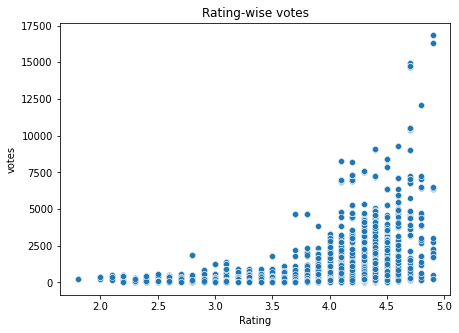

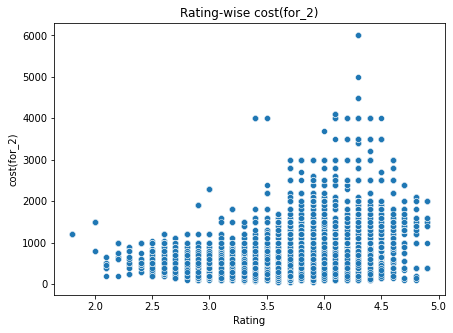

In [25]:
# Scatter Plot 

num_col = ['votes', 'cost(for_2)']

for i in num_col:
#     plt.subplot(a, b, )
    plt.figure(figsize = (7, 5))

    sns.scatterplot(x = data['rate'], y = data[i])
    plt.title('Rating-wise '+data[i].name)
    plt.ylabel(data[i].name)
    plt.xlabel('Rating')
    plt.show()

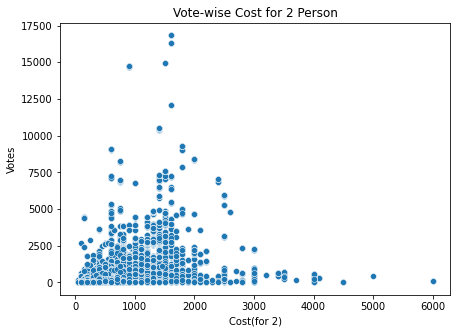

In [26]:
# Vote-Wise Cost for 2 Person Scatter Plot

plt.figure(figsize = (7, 5))
sns.scatterplot(y = data['votes'], x = data['cost(for_2)'])
plt.title('Vote-wise Cost for 2 Person')
plt.xlabel('Cost(for 2)')
plt.ylabel('Votes')
plt.show()

**iNSIGHTS -**

- from **Rating-wise Votes** Scatter plot, we can say **as rating increases number of votes also increases**.


- from **Rating-wise cost(for_2)** scatter plot, we can say 
    - *those restraurant registard as **`NEW`** also **having higher cost** for 2 person*.
    - as rating increases the cost also increasing. But **upto 90%** restraurant cost lies **<=2000**.
    

- from **Vote-wise Cost for 2 Person** scatterplot, we can say
    - upto 80% restraurant votes and cost(for 2) lies upto 2500 and 2000 respectively.

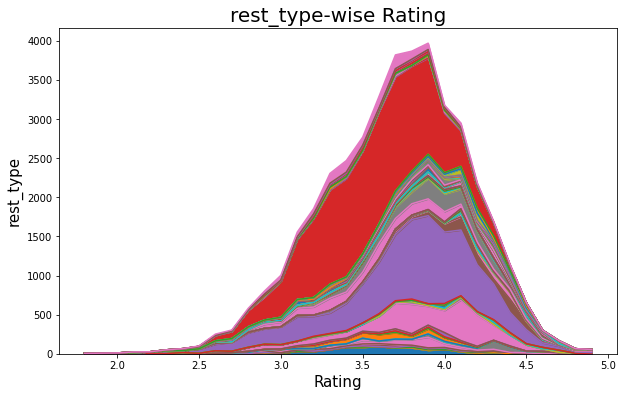

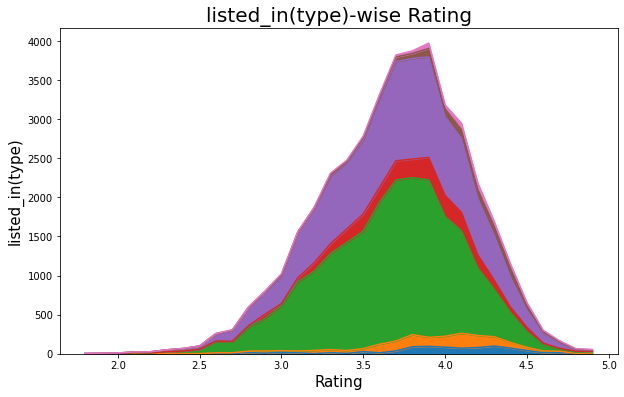

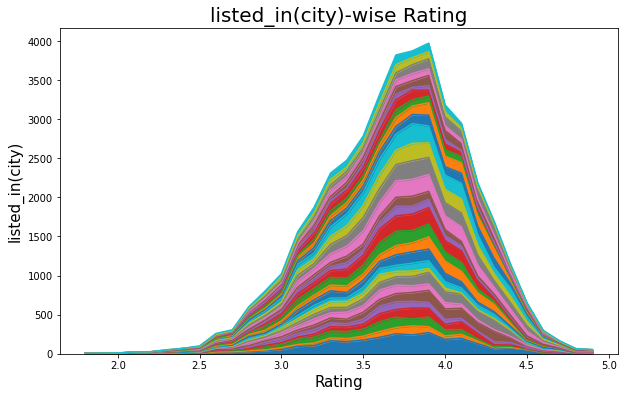

In [27]:
cat_col = ['rest_type',  'listed_in(type)', 'listed_in(city)']
for i in cat_col:
    type_plt=pd.crosstab(data['rate'],data[i])
    type_plt.plot(kind='area',stacked=True, figsize = (10, 6));
    plt.title(data[i].name+'-wise Rating',fontsize=20)
    plt.ylabel(data[i].name, fontsize=15)
    plt.xlabel('Rating', fontsize=15)
    plt.legend().remove()

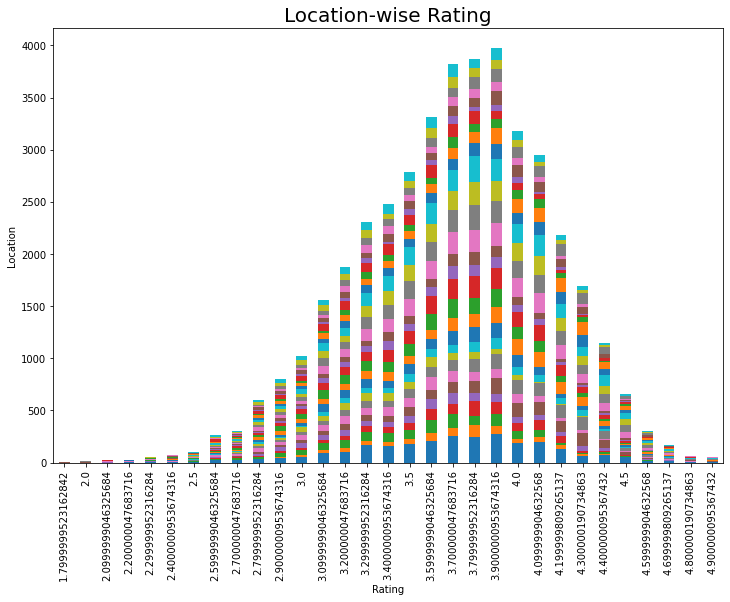

In [28]:
loc_plt=pd.crosstab(data['rate'],data['listed_in(city)'])
loc_plt.plot(kind='bar',stacked=True, figsize = (12, 8));
plt.title('Location-wise Rating',fontsize=20)
plt.ylabel('Location')
plt.xlabel('Rating')
plt.legend().remove()

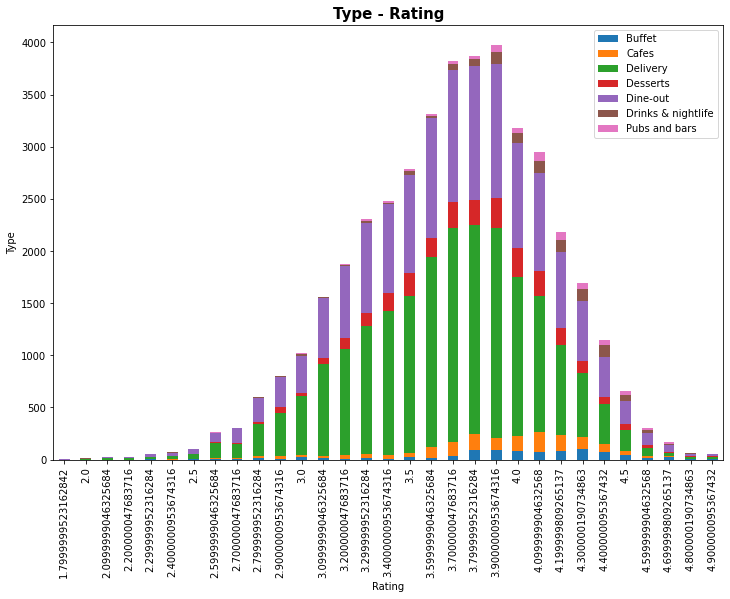

In [29]:
type_plt=pd.crosstab(data['rate'], data['listed_in(type)'])
type_plt.plot(kind='bar',stacked=True, figsize = (12, 8))
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type')
plt.xlabel('Rating')
plt.legend()

Text(0.5, 0, 'Number of outlets')

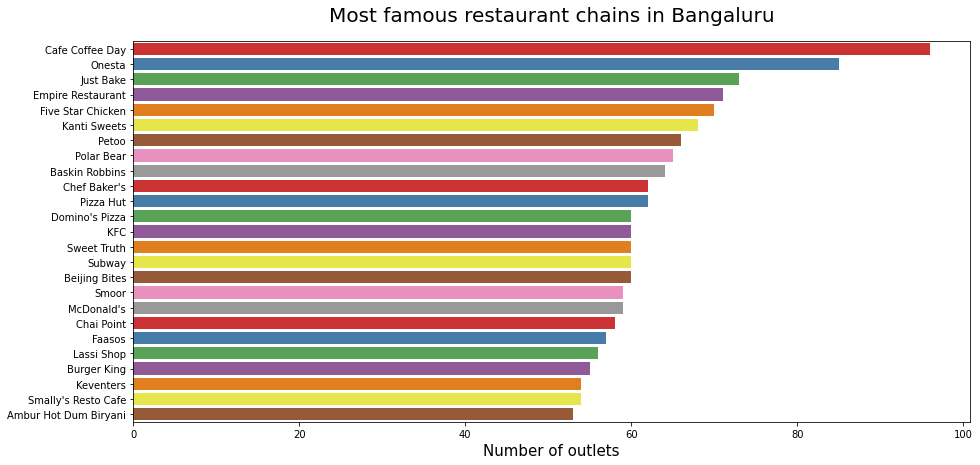

In [31]:
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:25]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### 4. Data Cleaning


In [32]:
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city) rate_outoff  cost(for_2)  
0          Buffet    Banashankari           5        800.0  
1          Buffet    Banashankari           5        800.0  
2          Buffet    Banashankari           5        800.0  
3          Buffet    Banashankari           5        300.0  
4          Buffet    Banashankari           5        600.0

**Missing Values, if any, Tretement**

In [45]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_outoff                    10052
cost(for_2)                      346
dtype: int64

In [7]:
# ## Creating New Data set by using .loc function 

rate_na = data.loc[data['rate'].isna()]
rate_na.head()

url  \
72  https://www.zomato.com/bangalore/spicy-tandoor...   
75  https://www.zomato.com/bangalore/om-sri-vinaya...   
84  https://www.zomato.com/bangalore/chill-out-ban...   
90  https://www.zomato.com/bangalore/me-and-my-cak...   
91  https://www.zomato.com/bangalore/sunsadm-banas...   

                                              address                   name  \
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...          Spicy Tandoor   
75  39, S B M Colony, Near-Sita Circle, 1st Stage,...  Om Sri Vinayaka Chats   
84  161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...              Chill Out   
90  BDA Shopping Complex, 24th Cross Road, Siddann...         Me And My Cake   
91  Shop 18 , 3rd cross road,Markandeya Layout, Ba...                Sunsadm   

   online_order book_table  rate  votes           phone      location  \
72           No         No   NaN      0  +91 8050884222  Banashankari   
75           No         No   NaN      0  +91 8553206035  Banashankari   
84           No         No   NaN      0  +91 9341215167  Banashankari   
90           No         No   NaN      0  +91 9036070410  Banashankari   
91           No         No   NaN      0  +91 7829290358  Banashankari   

             rest_type dish_liked                cuisines  \
72         Quick Bites        NaN            North Indian   
75  Takeaway, Delivery        NaN  Street Food, Fast Food   
84         Quick Bites        NaN   South Indian, Chinese   
90            Delivery        NaN        Bakery, Desserts   
91  Takeaway, Delivery        NaN            South Indian   

   approx_cost(for two people)  \
72                         150   
75                         500   
84                         100   
90                         500   
91                         400   

                                         reviews_list menu_item  \
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
75                                                 []        []   
84  [('Rated 4.0', 'RATED\n  Good Location. Small ...        []   
90  [('Rated 1.0', 'RATED\n  Do not order anything...        []   
91                                                 []        []   

   listed_in(type) listed_in(city) rate_outoff  cost(for_2)  
72        Delivery    Banashankari        None        150.0  
75        Delivery    Banashankari        None        500.0  
84        Delivery    Banashankari         NaN        100.0  
90        Delivery    Banashankari         NaN        500.0  
91        Delivery    Banashankari         NaN        400.0

In [46]:
# Dropping Votes which hase 0
df = data[data['votes'] != 0]

df.shape

(41690, 19)

**Rate** of restraurant is correlated with **Votes**,
- if their is no vote given by customer then there will be no rate. 
- because **Votes** has higher impact on **Rate**, because rate is defined as product of **average rates of given rate by all customers** with resprect of particular **restraurant**.


And This is reason I am taking dataframe which **doesn't contains votes as 0**.

And whatever is remaining **NaN** values remain in **Rate** columns I am imputing those values by median.

In [47]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                              44
votes                              0
phone                            817
location                           0
rest_type                        149
dish_liked                     18205
cuisines                          11
approx_cost(for two people)      250
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_outoff                       44
cost(for_2)                      250
dtype: int64

In [48]:
# Dropping unwanted attributes
df = df.drop(['phone', 'dish_liked', 'approx_cost(for two people)', 'rate_outoff'], axis = 1)

In [49]:
# Checking Mean and Median of Rate Attributes 
df.rate.median(), df.rate.mean()

(3.7, 3.700444)

In [50]:
# Checking Mean and Meadian of Cost(for 2) person 
df['cost(for_2)'].median(), df['cost(for_2)'].mean()

(500.0, 603.3182)

In [51]:
# Filling Missing Values by "Median" and "ffill" method in other attributes
df['rate'].fillna(df['rate'].median(), inplace = True)
df['cost(for_2)'].fillna(df['cost(for_2)'].median(), inplace = True)
df.fillna('Null', inplace = True)

# data.dropna(subset=['rate'],inplace=True) # Dropping missing values on subset "Rate" attribute

# Checking again if any missing value, if any.
print(f"\nChecking, if any, Missing Value remains- \n{'-'*50}\n{df.isna().sum()}")


Checking, if any, Missing Value remains- 
--------------------------------------------------
url                0
address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
cost(for_2)        0
dtype: int64


In [52]:
# If there any "NaN" values remain that will be dropped
df.dropna(inplace = True)

In [53]:
# Shape of dataframe 
df.shape

(41690, 15)

- Hence I have created dataset without **0** vote. 

    - Now I have imputed our target feature with **`median()`**, i.e., **3.7**
    - So this will not impact to much on our model. 
    
    - If I filled my target variable, which is having **10000+** missing values, with **either mean / median or 0.0**, Our machine learning model will become **`very Bias`** and model will be useless.


- Attribute **Cost(for_2)** also imputed with **`median()`**, i.e., **500**.
- Attributes **rest_type** and **cuisines** are filled with **`Null`**.

**Dropping Duplicates, if any**

In [54]:
# Checking any duplicates in dataframe
df.duplicated(keep = 'first').sum()

0

In [55]:
# Removing any Duplicate Values, if any
df.drop_duplicates(keep = 'first', inplace = True)

**Repalcing Values with Other Values in Listed_in(city)**

In [56]:
# Displaying Unique Values Before replacement
print(f"Unique Values before replacement - {df['listed_in(type)'].unique()}")

# Replacing values
replacer = {
    'Dine-out': 'Dining'
    ,'Buffet' : 'Dining'
    ,'Drinks & nightlife' : 'Pubs and Bars'
    ,'Pubs and bars' : 'Pubs and Bars'
    ,'Cafes' : 'Cafes and Desserts'
    ,'Desserts' : 'Cafes and Desserts'
}

df['listed_in(type)'] = df['listed_in(type)'].replace(replacer) # using replacer applied replace function.

# Displaying Unique values after replacement
print(f"Unique Values after replacement - {df['listed_in(type)'].unique()}")

Unique Values before replacement - ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']
Unique Values after replacement - ['Dining' 'Cafes and Desserts' 'Delivery' 'Pubs and Bars']


**Separating Cuisines and Creating Extra columns**

In [21]:
# # Spliting Cuisines by "," into Main_Cuisines and Second_Cuisines
# df[['Main_cuisines', 'Second_cuisines']] = df['cuisines'].str.split(',',n = 1, expand=True)

# # Dropping Cuisines Column
# df = df.drop('cuisines', axis = 1)

# df.head(3)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   

                                             address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   

  listed_in(type) listed_in(city)  cost(for_2) Main_cuisines  \
0          Dining    Banashankari        800.0  North Indian   
1          Dining    Banashankari        800.0       Chinese   
2          Dining    Banashankari        800.0          Cafe   

       Second_cuisines  
0     Mughlai, Chinese  
1   North Indian, Thai  
2     Mexican, Italian

In [57]:
# Stripping Whitespaces from dataframe

columns = df.select_dtypes(include="O")

for i in columns:
    df[i] = df[i].str.strip()

In [58]:
# Sending Cleaned data as "clean_data.csv" 
df.to_csv('new_clean_data.csv', sep = ',', index = False)

# Loading data
new_df = pd.read_csv('new_clean_data.csv')

In [59]:
new_df.head(2)

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table  rate  votes      location      rest_type  \
0          Yes        Yes   4.1    775  Banashankari  Casual Dining   
1          Yes         No   4.1    787  Banashankari  Casual Dining   

                         cuisines  \
0  North Indian, Mughlai, Chinese   
1     Chinese, North Indian, Thai   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  cost(for_2)  
0          Dining    Banashankari        800.0  
1          Dining    Banashankari        800.0

**Outlier Detection**

In [61]:

numeric = ['cost(for_2)', 'votes', 'rate']

for k, v in new_df[numeric].items(): 
    # 1st Quantile
    q1 = v.quantile(0.25)
    # 3rd Quantile
    q3 = v.quantile(0.75)
    # Inter-Quantile Range
    IQR = q3 - q1
    v_col = v[(v <= q1 - 1.5*IQR) | (v >= q3 + 1.5 * IQR)]
    perc = np.shape(v_col)[0]*100 / np.shape(new_df)[0]
    print(f"Column {k} outliers : {perc}")

Column cost(for_2) outliers : 8.788678340129527
Column votes outliers : 13.130247061645479
Column rate outliers : 0.8227392660110339


#### **Encoding**

In [62]:
df = new_df.copy() # creating copy to save from some trouble in future

In [63]:
#Encode the input Variables
def Encode(zomato):
    for column in df.columns[~df.columns.isin(['rate', 'cost(for_2)', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

# Applying Encoder
data_en = Encode(df.copy())
data_en.head() # looking at the dataset after transformation

url  address  name  online_order  book_table  rate  votes  location  \
0    0        0     0             0           0   4.1    775         0   
1    1        1     1             0           1   4.1    787         0   
2    2        2     2             0           1   3.8    918         0   
3    3        3     3             1           1   3.7     88         0   
4    4        4     4             1           1   3.8    166         1   

   rest_type  cuisines  reviews_list  menu_item  listed_in(type)  \
0          0         0             0          0                0   
1          0         1             1          0                0   
2          1         2             2          0                0   
3          2         3             3          0                0   
4          0         4             4          0                0   

   listed_in(city)  cost(for_2)  
0                0        800.0  
1                0        800.0  
2                0        800.0  
3                0        300.0  
4                0        600.0

### Correlation

<AxesSubplot:>

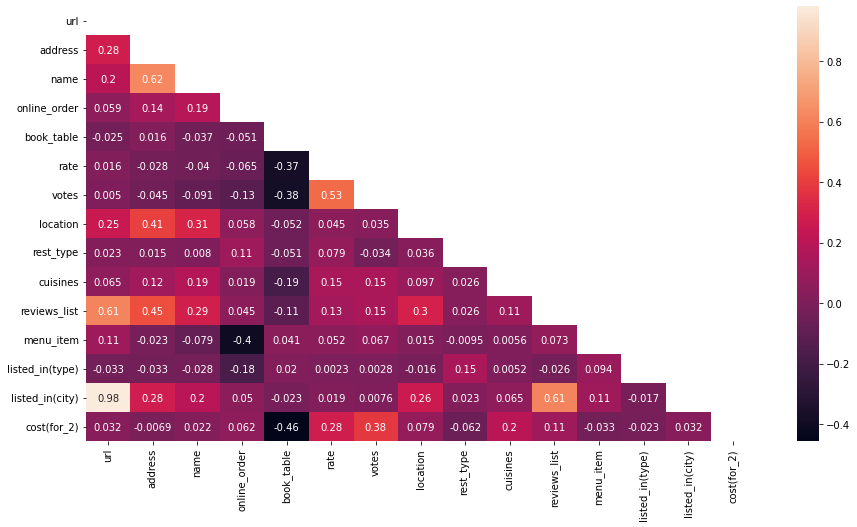

In [64]:
#Get Correlation between different variables
corr = data_en.corr(method='kendall')
plt.figure(figsize=(15,8))
# creating mask
mask = np.triu(np.ones_like(data_en.corr()))
sns.heatmap(corr, annot=True, mask=mask)
# new_data_en.columns

In [65]:
data_en.shape

(41690, 15)

# C. BASELINE MODELS

**Spliting Data into X, y**

In [66]:
X = data_en.drop(['rate'], axis = 1)
y = data_en['rate']

print(f"X Shape - {X.shape} and y Shape - {y.shape}")

X Shape - (41690, 14) and y Shape - (41690,)


In [67]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
# for data dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=375) # train test split
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=359) # validation set

# Displaying Shape of train, test and validation sets
print(f"--- X_train Shape - {X_train.shape}")
print(f"--- X_test Shape - {X_test.shape}")
# print(f"--- X_val Shape - {X_val.shape}")
print(f"--- y_train Shape - {y_train.shape}")
print(f"--- y_test Shape - {y_test.shape}")
# print(f"--- y_val Shape - {y_val.shape}")

--- X_train Shape - (29183, 14)
--- X_test Shape - (12507, 14)
--- y_train Shape - (29183,)
--- y_test Shape - (12507,)


**1. Linear Regression**

In [70]:
# # data after droping np.nan
lin = LinearRegression().fit(X_train, y_train)

lin_pred = lin.predict(X_test)

R2_score = r2_score(y_test, lin_pred)
print(f"--- R^2 Score - {R2_score}")
mae = mean_absolute_error(y_test, lin_pred)
print(f"--- Mean Absolute Error - {mae}")
mse = mean_squared_error(y_test, lin_pred)
print(f"--- Mean Squared Error - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
print(f"--- Root Mean Squared Error - {rmse}")


--- R^2 Score - 0.3104551862099495
--- Mean Absolute Error - 0.2792385622895365
--- Mean Squared Error - 0.13157394063094824
--- Root Mean Squared Error - 0.36273122367801236


- **OLS - LOGIT MODULE**

In [71]:
import statsmodels.api as sm

ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   rate   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          5.758e+04
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                        0.00
Time:                        14:50:50   Log-Likelihood:                         -51198.
No. Observations:               41690   AIC:                                  1.024e+05
Df Residuals:                   41676   BIC:                                  1.025e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [61]:
X.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'location', 'rest_type', 'cuisines', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'cost(for_2)'],
      dtype='object')

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

feature         VIF
0               url  644.065646
1           address   10.457841
2              name    6.309890
3      online_order    2.075647
4        book_table    4.283598
5             votes    1.433153
6          location    5.221352
7         rest_type    1.658830
8          cuisines    2.129862
9      reviews_list    7.713492
10        menu_item    1.604881
11  listed_in(type)    2.681774
12  listed_in(city)  683.146988
13      cost(for_2)    3.274140

As we can see from **Variance Inflation Factor**, the collinearity is **below 10** is not consider harmful for our model and we don't have to worry for it.

**2. Decision Tree Regressor**

In [79]:
dtree = DecisionTreeRegressor(min_samples_leaf=0.0001)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

dt_r2_score = r2_score(y_test, dtree_pred)
print(f"--- R2 Score Decision Tree test : {dt_r2_score}")

mae = mean_absolute_error(y_test, dtree_pred)
print(f"--- Mean Absolute Error decision tree - {mae}")
mse = mean_squared_error(y_test, dtree_pred)
print(f"--- Mean Squared Error decision tree - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, dtree_pred))
print(f"--- Root Mean Squared Error decision tree - {rmse}")


--- R2 Score Decision Tree test : 0.790741770928804
--- Mean Absolute Error decision tree - 0.08831281149223114
--- Mean Squared Error decision tree - 0.03992913768289758
--- Root Mean Squared Error decision tree - 0.19982276567723103


**4. Random Forest Regressor**

In [80]:
ranfor = RandomForestRegressor()
ranfor.fit(X_train, y_train)
rf_pred = ranfor.predict(X_test)

rf_r2_score = r2_score(y_test, rf_pred)
print(f"-- R2 Score of Random Forest - {rf_r2_score}")
mae = mean_absolute_error(y_test, rf_pred)
print(f"--- Mean Absolute Error Random Forest - {mae}")
mse = mean_squared_error(y_test, rf_pred)
print(f"--- Mean Squared Error Random Forest - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"--- Root Mean Squared Error Random Forest - {rmse}")

-- R2 Score of Random Forest - 0.9000029795318466
--- Mean Absolute Error Random Forest - 0.07251099384344781
--- Mean Squared Error Random Forest - 0.019080706244503073
--- Root Mean Squared Error Random Forest - 0.13813292961673937


**Extra Tree Regressor**

parameters -
1. **n_estimators** = [10, 50, 100, 500, 1000, 5000]
  - [for n in n_trees:models[str(n)] = ExtraTreesClassifier(n_estimators=n)]
    
    
2. **max_features** = np.arange[1, n]
  - [for i in range(1, 21):models[str(i)] = ExtraTreesClassifier(max_features=max_features)]
        

3. **min_samples_split** = np.arange[2, 21]

In [82]:
extra = ExtraTreesRegressor().fit(X_train, y_train)
extra_pred = extra.predict(X_test)

extra_r2 = r2_score(y_test, extra_pred)
print(f"--- R2 Score Extra Tree test : {extra_r2}")

mae = mean_absolute_error(y_test, extra_pred)
print(f"--- Mean Absolute Error Extra Tree - {mae}")
mse = mean_squared_error(y_test, extra_pred)
print(f"--- Mean Squared Error Extra Tree - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, extra_pred))
print(f"--- Root Mean Squared Error Extra Tree - {rmse}")


--- R2 Score Extra Tree test : 0.89287336277563
--- Mean Absolute Error Extra Tree - 0.07488990165507355
--- Mean Squared Error Extra Tree - 0.020441128008315344
--- Root Mean Squared Error Extra Tree - 0.14297247290410606


**AdaBoost Regressor**

- Parameters for Tuning -

    - **n_estimators** - number of decision trees used
    - **base_estimator** - Base model as weak learner
    - **learning_rate**


- grid['n_estimators'] = [10, 50, 100, 500]
- grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [83]:
ada = AdaBoostRegressor(base_estimator=ranfor).fit(X_train, y_train)

ada_pred = ada.predict(X_test)

ada_r2 = r2_score(y_test, ada_pred)
print(f"--- R2 Score AdaBoost test : {ada_r2}")

mae = mean_absolute_error(y_test, ada_pred)
print(f"--- Mean Absolute Error AdaBoost - {mae}")
mse = mean_squared_error(y_test, ada_pred)
print(f"--- Mean Squared Error AdaBoost - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, ada_pred))
print(f"--- Root Mean Squared Error AdaBoost - {rmse}")


--- R2 Score AdaBoost test : 0.918719716553752
--- Mean Absolute Error AdaBoost - 0.07526625089949626
--- Mean Squared Error AdaBoost - 0.015509314224034539
--- Root Mean Squared Error AdaBoost - 0.12453639718586104


**XGBoost Regressor**

In [84]:
xgb = XGBRegressor().fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_r2 = r2_score(y_test, xgb_pred)
print(f"--- R2 Score XGBoost test : {xgb_r2}")

mae = mean_absolute_error(y_test, xgb_pred)
print(f"--- Mean Absolute Error XGBoost - {mae}")
mse = mean_squared_error(y_test, xgb_pred)
print(f"--- Mean Squared Error XGBoost - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"--- Root Mean Squared Error XGBoost - {rmse}")


--- R2 Score XGBoost test : 0.7580776141099792
--- Mean Absolute Error XGBoost - 0.15298282658824094
--- Mean Squared Error XGBoost - 0.0461618751991406
--- Root Mean Squared Error XGBoost - 0.21485314798517754


**LightGBM Regressor**

In [85]:
lgbm = LGBMRegressor().fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

lgbm_r2 = r2_score(y_test, lgbm_pred)
print(f"--- R2 Score LGBM test : {lgbm_r2}")

mae = mean_absolute_error(y_test, lgbm_pred)
print(f"--- Mean Absolute Error LGBM - {mae}")
mse = mean_squared_error(y_test, lgbm_pred)
print(f"--- Mean Squared Error LGBM - {mse}")
rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
print(f"--- Root Mean Squared Error LGBM - {rmse}")

--- R2 Score LGBM test : 0.6533690345390399
--- Mean Absolute Error LGBM - 0.1878876328034795
--- Mean Squared Error LGBM - 0.06614160698233461
--- Root Mean Squared Error LGBM - 0.2571801061169674


In [86]:
models = {'Lin.Reg': lin, 'DT': dtree, 'RF': ranfor, 'Extra':extra
          ,'AdaBoost':ada, 'XGB':xgb, 'LightGBM':lgbm}

test_data = [X_test, X_test, X_test,  X_test, X_test, X_test, X_test]

model_performance = []
exp = 1
for key, value in models.items():
    model_performance.append([exp, key, r2_score(y_test, value.predict(test_data[exp-1]))])
    exp += 1


In [87]:
df = pd.DataFrame(model_performance, columns=['Model no.:', 'Base_Model', 'R2 Score'])
df

Model no.: Base_Model  R2 Score
0           1    Lin.Reg  0.310455
1           2         DT  0.790742
2           3         RF  0.900003
3           4      Extra  0.892873
4           5   AdaBoost  0.918720
5           6        XGB  0.758078
6           7   LightGBM  0.653369

from above base models, I have selected following models as per good $R^{2} \text { Score}$ ,

- Random Forest Regressor,
- Extra Trees Regressor, 
- AdaBoost Regressor with Random Forest as base model
- Decision Tree Regressor,
- XGBoost Regressor

So we are going to do some hyper-parameter tunning on this models.

# D. FEATURE ENGINEERING


**Log Transformation** - Normalize numerical variables

<AxesSubplot:ylabel='Frequency'>

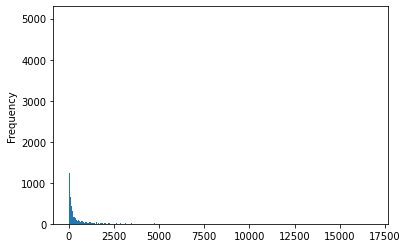

In [88]:
data_en['votes'].plot.hist(bins = 2000) # before Log Transformation uses

<AxesSubplot:ylabel='Frequency'>

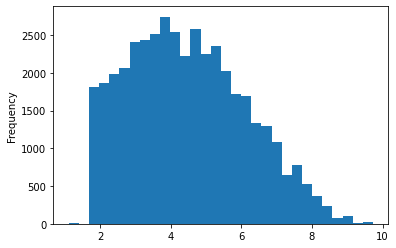

In [89]:
# applying Log Transformation
data_en['votes'] = data_en['votes'].apply(lambda x: np.log1p(x+1))


data_en['votes'].plot.hist(bins = 30) # After Log Transformation

<AxesSubplot:ylabel='Frequency'>

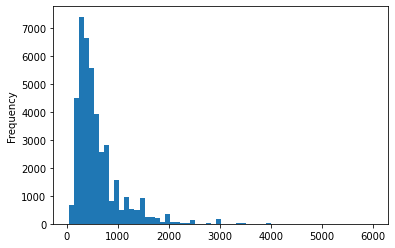

In [90]:
# Before Log Transformation
data_en['cost(for_2)'].plot.hist(bins = 60)

<AxesSubplot:ylabel='Frequency'>

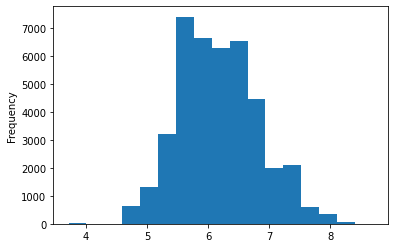

In [91]:
# Log Transformation
data_en['cost(for_2)'] = data_en['cost(for_2)'].apply(lambda x: np.log1p(x))
# new_data['rate'] = new_data['rate'].apply(lambda x: np.log1p(x))

data_en['cost(for_2)'].plot.hist(bins = 17)
# data_en.head()

**Outliers Removal**

In [92]:
def Outliers(df):
# for k, v in data_en[numeric].items(): 
    # 1st Quantile
    q1 = df.quantile(0.25)
    # 3rd Quantile
    q3 = df.quantile(0.75)
    # Inter-Quantile Range
    IQR = q3 - q1
    outlier_sum = ((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5 * IQR))).sum()#.sort_values(ascending=False)
    outlier_perc = ((outlier_sum / ((df < (q1 - 1.5*IQR))| (df > (q3 + 15.5 * IQR))).count())*100).sort_values(ascending=False)
    
    return pd.concat([outlier_sum, outlier_perc], axis=1, keys=['Outlier Sum', 'Outlier %'])

# Displaying Sum and percentage of Outliers
Outliers(data_en[numeric])

Outlier Sum  Outlier %
cost(for_2)          461   1.105781
votes                 25   0.059966
rate                 187   0.448549

**Feature Scaling**

In [94]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [95]:
# to Remove Outliers by using Robust Scaler
outlier_num = ['cost(for_2)', 'rate'] # Attributes which has outliers

rob = RobustScaler().fit(data_en[outlier_num].values)

data_en[outlier_num] = rob.transform(data_en[outlier_num].values)

data_en

url  address  name  online_order  book_table      rate     votes  \
0          0        0     0             0           0  0.666667  6.655440   
1          1        1     1             0           1  0.666667  6.670766   
2          2        2     2             0           1  0.166667  6.824374   
3          3        3     3             1           1  0.000000  4.499810   
4          4        4     4             1           1  0.166667  5.123964   
...      ...      ...   ...           ...         ...       ...       ...   
41685  41685     3150  2719             1           1  0.000000  3.583519   
41686  41686     8840  1728             1           1 -2.000000  4.418841   
41687  41687     8773  6599             1           1 -0.166667  3.367296   
41688  41688     8835  6635             1           0  1.000000  5.472271   
41689  41689     3459  6636             1           1 -0.500000  2.708050   

       location  rest_type  cuisines  reviews_list  menu_item  \
0             0          0         0             0          0   
1             0          0         1             1          0   
2             0          1         2             2          0   
3             0          2         3             3          0   
4             1          0         4             4          0   
...         ...        ...       ...           ...        ...   
41685        25         28       204          4045          0   
41686        25         28       766         21254          0   
41687        25         17       240         21128          0   
41688        56         17       237         21226          0   
41689        56         33      1878         21227          0   

       listed_in(type)  listed_in(city)  cost(for_2)  
0                    0                0     0.555070  
1                    0                0     0.555070  
2                    0                0     0.555070  
3                    0                0    -0.602670  
4                    0                0     0.215270  
...                ...              ...          ...  
41685                3               29     0.555070  
41686                3               29     0.555070  
41687                3               29     1.297946  
41688                3               29     1.901874  
41689                3               29     1.297946  

[41690 rows x 15 columns]

In [96]:
# Numeric columns where to apply scaler
numeric = ['votes']

# Fiting MinMaxScaler
mm = MinMaxScaler().fit(data_en[numeric].values)

# Transforming Numeric columns by applying MinMaxScaler
data_en[numeric] = mm.transform(data_en[numeric])

data_en

url  address  name  online_order  book_table      rate     votes  \
0          0        0     0             0           0  0.666667  0.643707   
1          1        1     1             0           1  0.666667  0.645482   
2          2        2     2             0           1  0.166667  0.663276   
3          3        3     3             1           1  0.000000  0.393997   
4          4        4     4             1           1  0.166667  0.466300   
...      ...      ...   ...           ...         ...       ...       ...   
41685  41685     3150  2719             1           1  0.000000  0.287853   
41686  41686     8840  1728             1           1 -2.000000  0.384618   
41687  41687     8773  6599             1           1 -0.166667  0.262806   
41688  41688     8835  6635             1           0  1.000000  0.506648   
41689  41689     3459  6636             1           1 -0.500000  0.186438   

       location  rest_type  cuisines  reviews_list  menu_item  \
0             0          0         0             0          0   
1             0          0         1             1          0   
2             0          1         2             2          0   
3             0          2         3             3          0   
4             1          0         4             4          0   
...         ...        ...       ...           ...        ...   
41685        25         28       204          4045          0   
41686        25         28       766         21254          0   
41687        25         17       240         21128          0   
41688        56         17       237         21226          0   
41689        56         33      1878         21227          0   

       listed_in(type)  listed_in(city)  cost(for_2)  
0                    0                0     0.555070  
1                    0                0     0.555070  
2                    0                0     0.555070  
3                    0                0    -0.602670  
4                    0                0     0.215270  
...                ...              ...          ...  
41685                3               29     0.555070  
41686                3               29     0.555070  
41687                3               29     1.297946  
41688                3               29     1.901874  
41689                3               29     1.297946  

[41690 rows x 15 columns]

**Feature Importance**

In [97]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,6))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel(model_type)
    

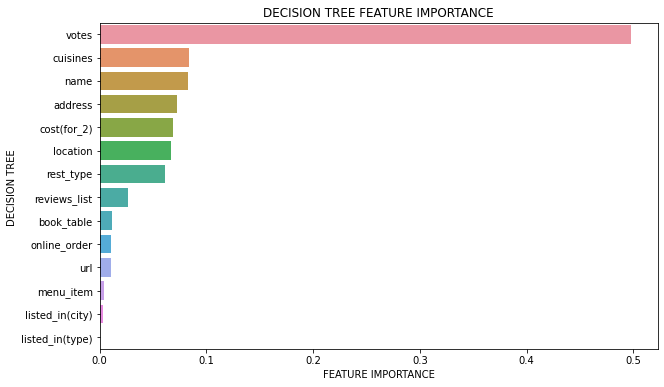

In [98]:
# Feature Importance from Decision Tree
plot_feature_importance(dtree.feature_importances_, X_train.columns, 'DECISION TREE ')

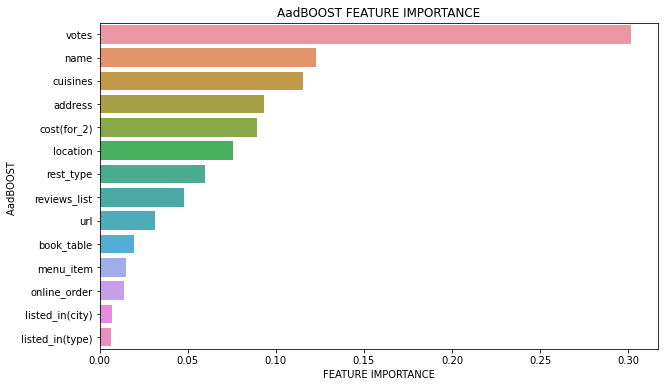

In [99]:
# Feature Importance for AdaBoost 
plot_feature_importance(ada.feature_importances_, X_train.columns,'AadBOOST ')

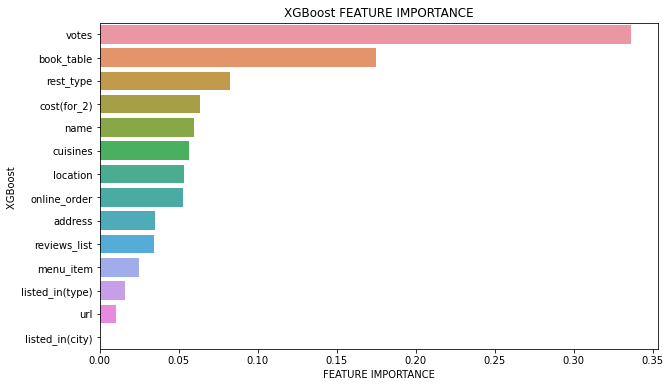

In [100]:
# Feature Importance for XGBOOST
plot_feature_importance(xgb.feature_importances_, X_train.columns, 'XGBoost ')

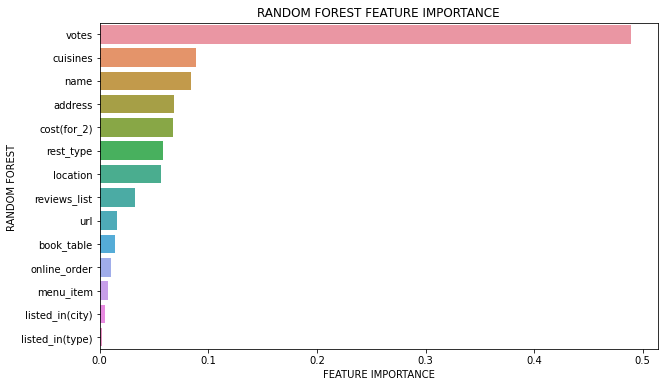

In [101]:
# Feature Inportance for Random Forest
plot_feature_importance(ranfor.feature_importances_,X_train.columns,'RANDOM FOREST ')

**Base Model after Feature Importance**

In [111]:
# Selecting Features as per feature importance
new_x = data_en.drop(['rate', 'listed_in(type)', 'listed_in(city)', 'menu_item', 'online_order', 'book_table', 'url'
                      ,'reviews_list'], axis=1)
new_y = data_en['rate']

In [112]:
new_x

address  name     votes  location  rest_type  cuisines  cost(for_2)
0            0     0  0.643707         0          0         0     0.555070
1            1     1  0.645482         0          0         1     0.555070
2            2     2  0.663276         0          1         2     0.555070
3            3     3  0.393997         0          2         3    -0.602670
4            4     4  0.466300         1          0         4     0.215270
...        ...   ...       ...       ...        ...       ...          ...
41685     3150  2719  0.287853        25         28       204     0.555070
41686     8840  1728  0.384618        25         28       766     0.555070
41687     8773  6599  0.262806        25         17       240     1.297946
41688     8835  6635  0.506648        56         17       237     1.901874
41689     3459  6636  0.186438        56         33      1878     1.297946

[41690 rows x 7 columns]

In [113]:
# Train_test for selected features
xtrain, xtest, ytrain, ytest = train_test_split(new_x, new_y, test_size=0.30, random_state=7)

In [114]:
new_dt = DecisionTreeRegressor().fit(xtrain, ytrain)
new_dt.score(xtest, ytest)

0.8831518525850209

In [122]:
new_rf = RandomForestRegressor(n_estimators=150, max_depth=23, verbose=1, n_jobs=-1, random_state=373).fit(xtrain, ytrain)
new_rf.score(xtest, ytest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 150 out of 150 | elapsed:    0.0s finished


0.9200268399488833

In [123]:
from sklearn.model_selection import KFold, cross_val_score

fold = 10
scoring = 'r2'

kfold = KFold(n_splits= fold, shuffle=True, random_state=373)
cv_score = cross_val_score(new_rf, xtest, ytest, cv = kfold, n_jobs=-1, scoring=scoring,verbose=50)
cv_score.mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   2 out of  10 | elapsed:   10.3s remaining:   41.6s
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   10.3s remaining:   24.3s
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:   10.3s remaining:   15.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   10.4s remaining:   10.4s
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   10.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   10.4s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   10.4s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.5s finished


0.7975540005128928

In [134]:
new_extra = ExtraTreesRegressor(n_estimators=100, n_jobs=-1, min_samples_split=3
                                 ,min_samples_leaf=2, max_features=5).fit(xtrain, ytrain)

new_extra.score(xtest, ytest)

0.9144378096739298

# E. HYPER-PARAMETER TUNNING

In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

**i. GridSearchCV for AdaBoost with ExtraTree Base Estimator**

In [139]:
# ## GridSearchCV On AdaBoost with base estimator Extra Tree
extra_tree = ExtraTreesRegressor(n_estimators=100, n_jobs=-1, min_samples_split=3
                                 ,min_samples_leaf=2, max_features=5)

ada_tune = AdaBoostRegressor(base_estimator=extra_tree)

# Cross Validation
fold = 10
score = 'r2'
cv_model = KFold(n_splits=fold, shuffle= True, random_state=7)


In [140]:
gsc = GridSearchCV(estimator=ada_tune
                   ,param_grid={
                       'n_estimators' : [100]
                       ,'learning_rate': [0.0275, 0.1, 0.25,  0.5, 1.0]}
                   ,scoring='r2'
                   ,cv=cv_model
                  )


grid_result = gsc.fit(xtrain, ytrain)

In [141]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.937045 using {'learning_rate': 0.1, 'n_estimators': 100}


In [142]:
grid_result

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=AdaBoostRegressor(base_estimator=ExtraTreesRegressor(max_features=5,
                                                                            min_samples_leaf=2,
                                                                            min_samples_split=3,
                                                                            n_jobs=-1)),
             param_grid={'learning_rate': [0.1], 'n_estimators': [100]},
             scoring='r2')

In [148]:
# Optimized Parameter
opt_parameters = {'learning_rate': 0.1, 'n_estimators': 100}

#set optimal parameters
ada = ada_tune.set_params(**opt_parameters)

In [149]:
import pickle

# Writing pikle
with open('AdaBoost_Base_ExtraTree.pkl', 'wb') as f:
    pickle.dump(ada, f)
    

# Reading 'AdaBoost_Base_ExtraTree.pkl' pikle file
with open('AdaBoost_Base_ExtraTree.pkl', 'rb') as f:
    model = pickle.load(f)

In [150]:
model

AdaBoostRegressor(base_estimator=ExtraTreesRegressor(max_features=5,
                                                     min_samples_leaf=2,
                                                     min_samples_split=3,
                                                     n_jobs=-1),
                  learning_rate=0.1, n_estimators=100)

**ii. RandomizeSearchCV for Random Forest**

In [152]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [153]:
rf_random = RandomizedSearchCV(estimator = new_rf
                               ,param_distributions = random_grid
                               ,n_iter = 100
                               ,cv = cv_model
                               ,verbose=2
                               ,scoring='r2'
                               ,random_state=42
                               ,n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 230 out of 230 | elapsed:    4.5s finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
                   estimator=RandomForestRegressor(max_depth=23,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=373,
                                                   verbose=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   random_state=42